In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import anndata as ad 
import squidpy as sq
from skimage import io
sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

/home/vgaya/anaconda3/envs/py_env/lib/python3.13/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/vgaya/anaconda3/envs/py_env/lib/python3.13/site-packages/spatialdata/_core/query/relational_query.py:504: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in enum.member() if you want to preserve the old behavior
  left = partial(_left_join_spatialelement_table)
/home/vgaya/anaconda3/envs/py_env/lib/python3.13/site-packages/spatialdata/_core/query/relational_query.py:505: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in enum.member() if you want to preserve the old behavior
  left_exclusive = partial(_left_exclusive_join_

squidpy==1.6.2


In [2]:
file_patient19_1 = 'Paciente19_merge_1.h5ad'

patient19 = sc.read_h5ad(file_patient19_1)

In [5]:
patient19.shape  # (número de células, número de genes)

(4992, 28463)

In [ ]:
patient19.obsm['spatial']

array([[ 3312,  1309],
       [13023, 11134],
       [ 6360,  1899],
       ...,
       [ 4554, 10151],
       [ 6135, 15653],
       [ 7264,  2685]])

In [15]:
type(patient19.X)

scipy.sparse._csr.csr_matrix

In [8]:
patient19.var['x']

x
MIR6859-1      MIR6859-1
MIR1302-2      MIR1302-2
OR4F5              OR4F5
RNU6-1100P    RNU6-1100P
MIR6859-2      MIR6859-2
                 ...    
SNORA70.26    SNORA70.26
RNU6-1314P    RNU6-1314P
VAMP7.1          VAMP7.1
IL9R.1            IL9R.1
WASH6P.1        WASH6P.1
Name: x, Length: 28463, dtype: object

In [9]:
patient19.obs.index

Index(['slice19_1_AAACAACGAATAGTTC-1', 'slice19_1_AAACAAGTATCTCCCA-1',
       'slice19_1_AAACAATCTACTAGCA-1', 'slice19_1_AAACACCAATAACTGC-1',
       'slice19_1_AAACAGAGCGACTCCT-1', 'slice19_1_AAACAGCTTTCAGAAG-1',
       'slice19_1_AAACAGGGTCTATATT-1', 'slice19_1_AAACAGTGTTCCTGGG-1',
       'slice19_1_AAACATGGTGAGAGGA-1', 'slice19_1_AAACATTTCCCGGATT-1',
       ...
       'slice19_1_TTGTTAGCAAATTCGA-1', 'slice19_1_TTGTTCAGTGTGCTAC-1',
       'slice19_1_TTGTTCTAGATACGCT-1', 'slice19_1_TTGTTGGCAATGACTG-1',
       'slice19_1_TTGTTGTGTGTCAAGA-1', 'slice19_1_TTGTTTCACATCCAGG-1',
       'slice19_1_TTGTTTCATTAGTCTA-1', 'slice19_1_TTGTTTCCATACAACT-1',
       'slice19_1_TTGTTTGTATTACACG-1', 'slice19_1_TTGTTTGTGTAAATTC-1'],
      dtype='object', length=4992)

In [10]:
patient19.var_names

Index(['MIR6859-1', 'MIR1302-2', 'OR4F5', 'RNU6-1100P', 'MIR6859-2', 'OR4F29',
       'U6', 'AC114498.2', 'OR4F16', 'RNU6-1199P',
       ...
       'BPY2C', 'RN7SL725P', 'CDY1', 'RNU1-107P', 'RNU1-40P', 'SNORA70.26',
       'RNU6-1314P', 'VAMP7.1', 'IL9R.1', 'WASH6P.1'],
      dtype='object', name='x', length=28463)

In [11]:
patient19.obs['name'].unique()

['slice19_1']
Categories (1, object): ['slice19_1']

In [12]:
patient19.uns

{'spatial': {'slice19_1': {'images': {'hires': array([[[219, 229, 253],
            [220, 228, 253],
            [220, 228, 253],
            ...,
            [206, 213, 253],
            [206, 211, 252],
            [207, 212, 253]],
    
           [[218, 228, 252],
            [220, 228, 253],
            [220, 228, 253],
            ...,
            [201, 205, 252],
            [203, 208, 252],
            [206, 211, 253]],
    
           [[219, 227, 252],
            [220, 228, 253],
            [220, 228, 253],
            ...,
            [188, 190, 249],
            [189, 192, 247],
            [183, 189, 243]],
    
           ...,
    
           [[142, 146, 219],
            [187, 190, 245],
            [151, 156, 222],
            ...,
            [216, 225, 252],
            [216, 225, 252],
            [218, 226, 253]],
    
           [[ 97,  97, 181],
            [124, 126, 201],
            [125, 128, 205],
            ...,
            [216, 225, 252],
            [21

In [13]:
patient19.obsm['spatial']

array([[ 3312,  1309],
       [13023, 11134],
       [ 6360,  1899],
       ...,
       [ 4554, 10151],
       [ 6135, 15653],
       [ 7264,  2685]])

In [14]:
patient19.obs

,orig.ident,nCount_Spatial,nFeature_Spatial,name,info,percent.butterfly,tissue,row,col,imagerow,imagecol
slice19_1_AAACAACGAATAGTTC-1,SeuratProject,3134,1647,slice19_1,paciente19,0.000000,1,16,0,3312,1309
slice19_1_AAACAAGTATCTCCCA-1,SeuratProject,507,328,slice19_1,paciente19,0.000000,1,102,50,13023,11134
slice19_1_AAACAATCTACTAGCA-1,SeuratProject,906,542,slice19_1,paciente19,0.110375,1,43,3,6360,1899
slice19_1_AAACACCAATAACTGC-1,SeuratProject,3385,1610,slice19_1,paciente19,0.088626,1,19,59,3650,12902
slice19_1_AAACAGAGCGACTCCT-1,SeuratProject,1680,1070,slice19_1,paciente19,0.059524,1,94,14,12120,4060
...,...,...,...,...,...,...,...,...,...,...,...
slice19_1_TTGTTTCACATCCAGG-1,SeuratProject,4484,2466,slice19_1,paciente19,0.356824,1,42,58,6247,12706
slice19_1_TTGTTTCATTAGTCTA-1,SeuratProject,3655,2105,slice19_1,paciente19,0.164159,1,30,60,4892,13099
slice19_1_TTGTTTCCATACAACT-1,SeuratProject,472,284,slice19_1,paciente19,0.000000,1,27,45,4554,10151
slice19_1_TTGTTTGTATTACACG-1,SeuratProject,1687,865,slice19_1,paciente19,0.118554,1,41,73,6135,15653


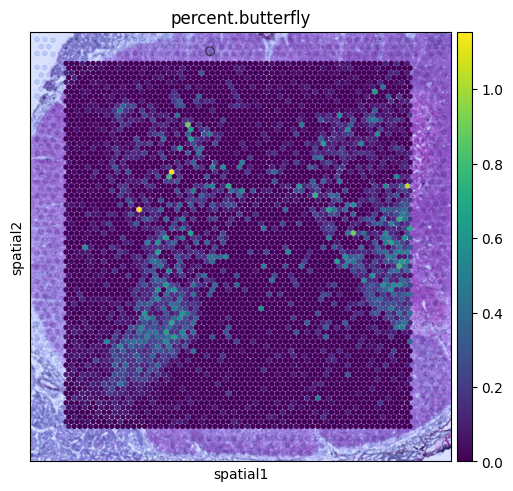

In [ ]:
sq.pl.spatial_scatter(
    patient19, 
    color = "percent.butterfly", 
    size = 1.5)


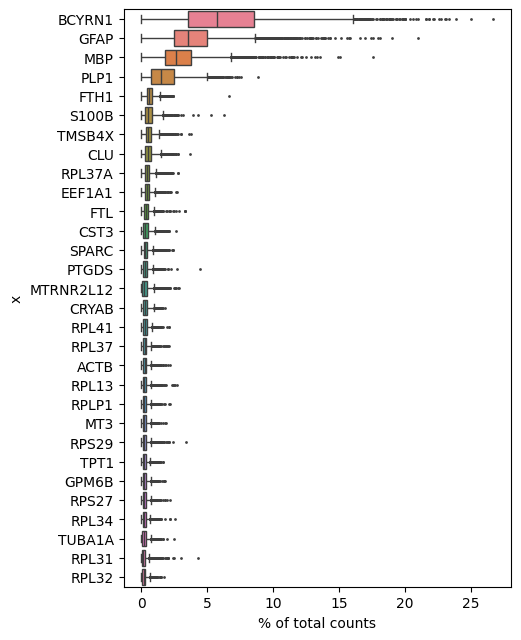

In [17]:
sc.pl.highest_expr_genes(adata=patient19)

In [54]:
sq.gr.spatial_neighbors(patient19)

/tmp/ipykernel_938139/2852303095.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(patient19, color="percent.butterfly")


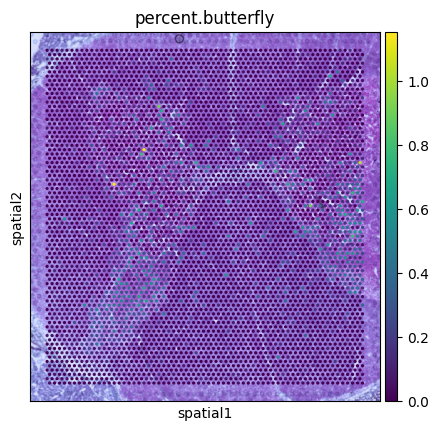

<function scanpy.plotting._tools.scatterplots.spatial(adata: anndata._core.anndata.AnnData, *, color: str | collections.abc.Sequence[str] | None = None, mask_obs: numpy.ndarray[typing.Any, numpy.dtype[numpy.bool]] | str | None = None, gene_symbols: str | None = None, use_raw: bool | None = None, sort_order: bool = True, edges: bool = False, edges_width: float = 0.1, edges_color: str | collections.abc.Sequence[float] | collections.abc.Sequence[str] = 'grey', neighbors_key: str | None = None, arrows: bool = False, arrows_kwds: collections.abc.Mapping[str, typing.Any] | None = None, groups: str | collections.abc.Sequence[str] | None = None, components: str | collections.abc.Sequence[str] | None = None, dimensions: tuple[int, int] | collections.abc.Sequence[tuple[int, int]] | None = None, layer: str | None = None, projection: Literal['2d', '3d'] = '2d', scale_factor: float | None = None, color_map: matplotlib.colors.Colormap | str | None = None, cmap: matplotlib.colors.Colormap | str | Non

In [18]:
sc.pl.spatial(patient19, color="percent.butterfly")
sc.pl.spatial

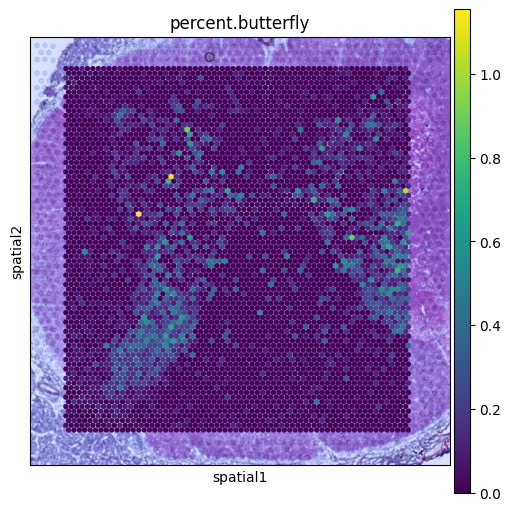

In [ ]:
sq.pl.spatial_scatter(
    patient19,
    size = 1.5,
    color='percent.butterfly',
    figsize= (5, 5)
)